In [3]:
epochs = 35
batch_size = 128

train_dir_path = 'train/simpsons_dataset'
test_dir_path = 'testset/testset'
sample_submission_path = 'sample_submission.csv'

state_path = 'output/state.pth'
history_path = 'output/history.pkl'
submission_path = 'output/submission.csv'

In [2]:
import os

os.environ["MASTER_ADDR"] = "127.0.0.1"
os.environ["MASTER_PORT"] = "8888"

In [6]:
from pathlib import Path
import torch.multiprocessing as mp
from src.train import train
from sklearn.preprocessing import LabelEncoder
import torch

TRAIN_DIR = Path(train_dir_path)
TEST_DIR = Path(test_dir_path)

train_val_files = list(TRAIN_DIR.rglob('*.jpg'))
test_files = list(TEST_DIR.rglob('*.jpg'))

label_encoder = LabelEncoder()
label_encoder.fit([path.parent.name for path in train_val_files])
gpu_count = torch.cuda.device_count()

In [4]:
%%time
mp.spawn(train, nprocs=gpu_count, args=(train_val_files, gpu_count, batch_size, epochs, label_encoder, state_path, history_path))

epoch:   3%|▎         | 1/35 [00:58<33:24, 58.96s/it]


Epoch 001 train_loss: 2.0630     val_loss 1.3114 train_acc 0.4405 val_acc 0.6492 train_f1 0.5714 val_f1 0.6491


epoch:   6%|▌         | 2/35 [01:56<32:04, 58.31s/it]


Epoch 002 train_loss: 0.9997     val_loss 0.8408 train_acc 0.7273 val_acc 0.7734 train_f1 0.7857 val_f1 0.8421


epoch:   9%|▊         | 3/35 [02:54<30:49, 57.80s/it]


Epoch 003 train_loss: 0.5332     val_loss 0.6224 train_acc 0.8534 val_acc 0.8292 train_f1 0.9286 val_f1 0.7018


epoch:  11%|█▏        | 4/35 [03:51<29:49, 57.73s/it]


Epoch 004 train_loss: 0.2822     val_loss 0.4144 train_acc 0.9292 val_acc 0.8900 train_f1 1.0000 val_f1 0.9298


epoch:  14%|█▍        | 5/35 [04:50<29:03, 58.11s/it]


Epoch 005 train_loss: 0.1914     val_loss 0.3362 train_acc 0.9487 val_acc 0.9175 train_f1 0.9524 val_f1 0.9123


epoch:  17%|█▋        | 6/35 [05:48<28:05, 58.11s/it]


Epoch 006 train_loss: 0.1181     val_loss 0.3296 train_acc 0.9713 val_acc 0.9305 train_f1 0.9762 val_f1 1.0000


epoch:  20%|██        | 7/35 [06:48<27:22, 58.66s/it]


Epoch 007 train_loss: 0.0980     val_loss 0.3018 train_acc 0.9744 val_acc 0.9289 train_f1 0.9762 val_f1 0.9825


epoch:  23%|██▎       | 8/35 [07:45<26:10, 58.18s/it]


Epoch 008 train_loss: 0.0711     val_loss 0.2696 train_acc 0.9828 val_acc 0.9373 train_f1 0.9762 val_f1 0.9474


epoch:  26%|██▌       | 9/35 [08:45<25:30, 58.85s/it]


Epoch 009 train_loss: 0.0570     val_loss 0.2777 train_acc 0.9860 val_acc 0.9412 train_f1 0.9762 val_f1 0.9474


epoch:  29%|██▊       | 10/35 [09:42<24:13, 58.13s/it]


Epoch 010 train_loss: 0.0493     val_loss 0.2689 train_acc 0.9884 val_acc 0.9434 train_f1 1.0000 val_f1 0.9649


epoch:  31%|███▏      | 11/35 [10:41<23:26, 58.59s/it]


Epoch 011 train_loss: 0.0479     val_loss 0.2211 train_acc 0.9882 val_acc 0.9522 train_f1 1.0000 val_f1 0.9123


epoch:  34%|███▍      | 12/35 [11:39<22:18, 58.19s/it]


Epoch 012 train_loss: 0.0447     val_loss 0.2426 train_acc 0.9899 val_acc 0.9434 train_f1 1.0000 val_f1 0.8947


epoch:  37%|███▋      | 13/35 [12:38<21:29, 58.61s/it]


Epoch 013 train_loss: 0.0439     val_loss 0.2349 train_acc 0.9901 val_acc 0.9499 train_f1 1.0000 val_f1 0.9474


epoch:  40%|████      | 14/35 [13:35<20:18, 58.03s/it]


Epoch 014 train_loss: 0.0626     val_loss 0.2261 train_acc 0.9833 val_acc 0.9503 train_f1 0.9762 val_f1 0.9298


epoch:  43%|████▎     | 15/35 [14:34<19:23, 58.19s/it]


Epoch 015 train_loss: 0.0406     val_loss 0.2310 train_acc 0.9894 val_acc 0.9492 train_f1 1.0000 val_f1 0.9649


epoch:  46%|████▌     | 16/35 [15:31<18:18, 57.83s/it]


Epoch 016 train_loss: 0.0366     val_loss 0.2491 train_acc 0.9904 val_acc 0.9522 train_f1 1.0000 val_f1 0.9825


epoch:  49%|████▊     | 17/35 [16:29<17:21, 57.88s/it]


Epoch 017 train_loss: 0.0448     val_loss 0.2499 train_acc 0.9883 val_acc 0.9454 train_f1 0.9762 val_f1 0.9474


epoch:  51%|█████▏    | 18/35 [17:27<16:24, 57.91s/it]


Epoch 018 train_loss: 0.0452     val_loss 0.2055 train_acc 0.9893 val_acc 0.9545 train_f1 1.0000 val_f1 1.0000


epoch:  54%|█████▍    | 19/35 [18:24<15:24, 57.79s/it]


Epoch 019 train_loss: 0.0299     val_loss 0.2223 train_acc 0.9936 val_acc 0.9492 train_f1 1.0000 val_f1 0.9474


epoch:  57%|█████▋    | 20/35 [19:21<14:21, 57.44s/it]


Epoch 020 train_loss: 0.0344     val_loss 0.2381 train_acc 0.9929 val_acc 0.9519 train_f1 1.0000 val_f1 0.9123

Epoch 021 train_loss: 0.0362     val_loss 0.2125 train_acc 0.9918 val_acc 0.9553 train_f1 1.0000 val_f1 0.9474


epoch:  63%|██████▎   | 22/35 [21:18<12:36, 58.16s/it]


Epoch 022 train_loss: 0.0471     val_loss 0.2466 train_acc 0.9882 val_acc 0.9499 train_f1 1.0000 val_f1 0.9649


epoch:  66%|██████▌   | 23/35 [22:18<11:43, 58.65s/it]


Epoch 023 train_loss: 0.0399     val_loss 0.2158 train_acc 0.9898 val_acc 0.9519 train_f1 1.0000 val_f1 0.9123


epoch:  69%|██████▊   | 24/35 [23:15<10:39, 58.15s/it]


Epoch 024 train_loss: 0.0469     val_loss 0.2584 train_acc 0.9876 val_acc 0.9461 train_f1 1.0000 val_f1 0.9123


epoch:  71%|███████▏  | 25/35 [24:16<09:48, 58.81s/it]


Epoch 025 train_loss: 0.0392     val_loss 0.1824 train_acc 0.9904 val_acc 0.9583 train_f1 1.0000 val_f1 0.9474


epoch:  74%|███████▍  | 26/35 [25:12<08:42, 58.03s/it]


Epoch 026 train_loss: 0.0338     val_loss 0.1968 train_acc 0.9922 val_acc 0.9561 train_f1 0.9762 val_f1 0.9825


epoch:  77%|███████▋  | 27/35 [26:12<07:49, 58.66s/it]


Epoch 027 train_loss: 0.0340     val_loss 0.2080 train_acc 0.9915 val_acc 0.9576 train_f1 0.9762 val_f1 0.9825


epoch:  80%|████████  | 28/35 [27:11<06:51, 58.85s/it]


Epoch 028 train_loss: 0.0313     val_loss 0.1928 train_acc 0.9936 val_acc 0.9595 train_f1 1.0000 val_f1 0.9825


epoch:  83%|████████▎ | 29/35 [28:11<05:54, 59.10s/it]


Epoch 029 train_loss: 0.0212     val_loss 0.1993 train_acc 0.9958 val_acc 0.9591 train_f1 1.0000 val_f1 0.9298


epoch:  86%|████████▌ | 30/35 [29:08<04:53, 58.61s/it]


Epoch 030 train_loss: 0.0316     val_loss 0.2489 train_acc 0.9922 val_acc 0.9469 train_f1 0.9762 val_f1 0.9649


epoch:  89%|████████▊ | 31/35 [30:08<03:55, 58.87s/it]


Epoch 031 train_loss: 0.0462     val_loss 0.3010 train_acc 0.9878 val_acc 0.9358 train_f1 0.9524 val_f1 0.8947


epoch:  91%|█████████▏| 32/35 [31:06<02:56, 58.76s/it]


Epoch 032 train_loss: 0.0675     val_loss 0.2335 train_acc 0.9824 val_acc 0.9442 train_f1 0.9762 val_f1 0.8772


epoch:  94%|█████████▍| 33/35 [32:04<01:56, 58.43s/it]


Epoch 033 train_loss: 0.0559     val_loss 0.2373 train_acc 0.9851 val_acc 0.9538 train_f1 0.9762 val_f1 0.9825


epoch:  97%|█████████▋| 34/35 [33:03<00:58, 58.58s/it]


Epoch 034 train_loss: 0.0345     val_loss 0.2126 train_acc 0.9902 val_acc 0.9515 train_f1 1.0000 val_f1 0.9123


epoch: 100%|██████████| 35/35 [34:01<00:00, 58.33s/it]



Epoch 035 train_loss: 0.0390     val_loss 0.1950 train_acc 0.9906 val_acc 0.9576 train_f1 1.0000 val_f1 0.9649
CPU times: user 222 ms, sys: 49.3 ms, total: 271 ms
Wall time: 34min 8s


In [5]:
import pickle

with open(history_path, 'rb') as f:
    history = pickle.load(f)

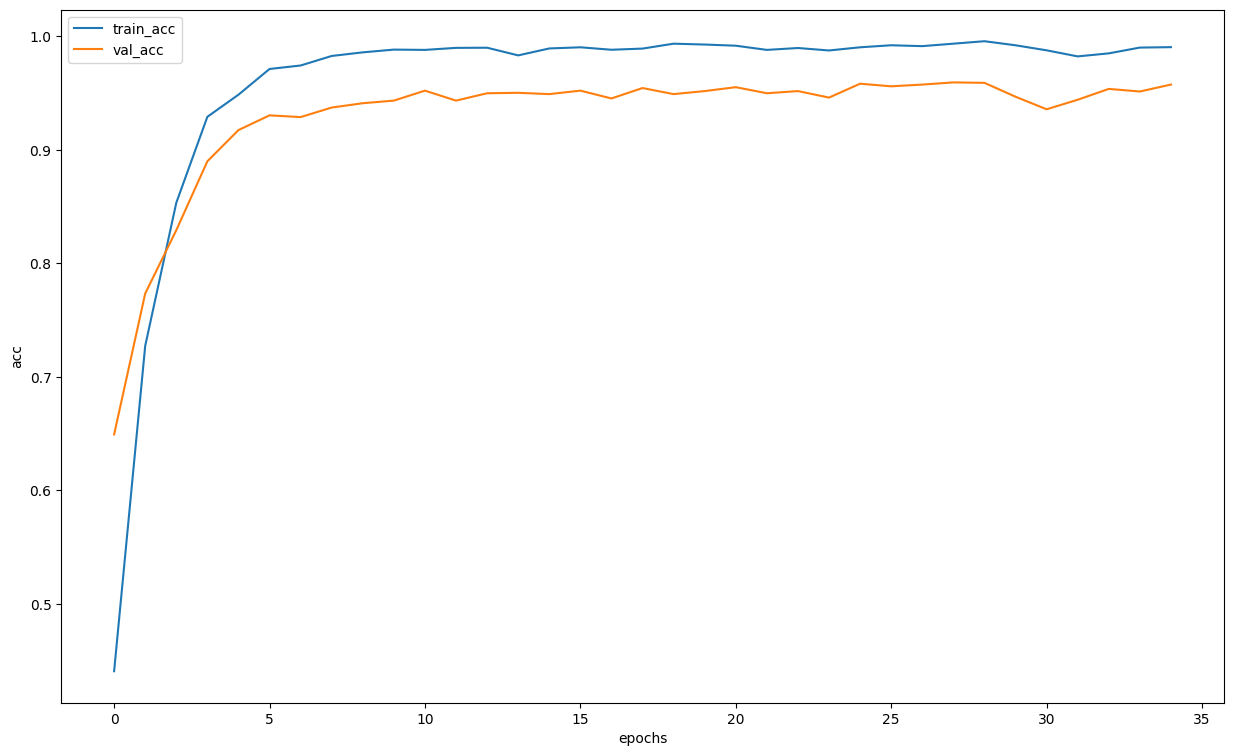

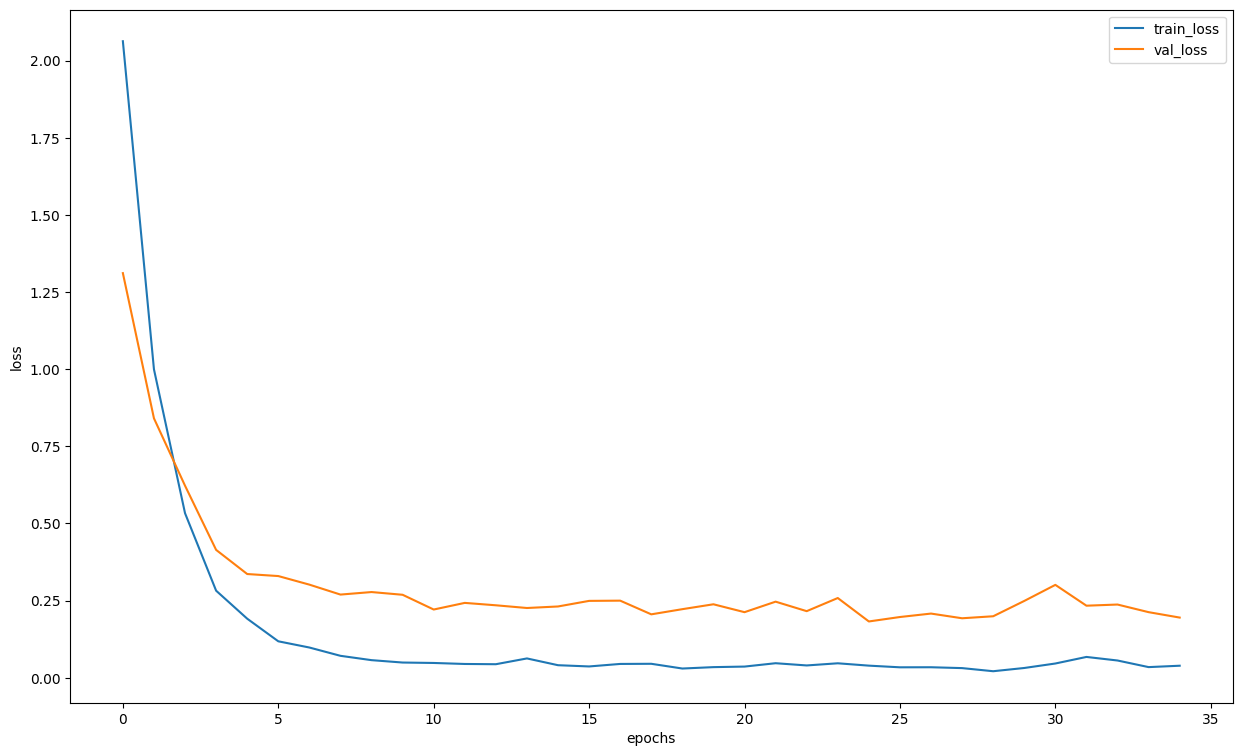

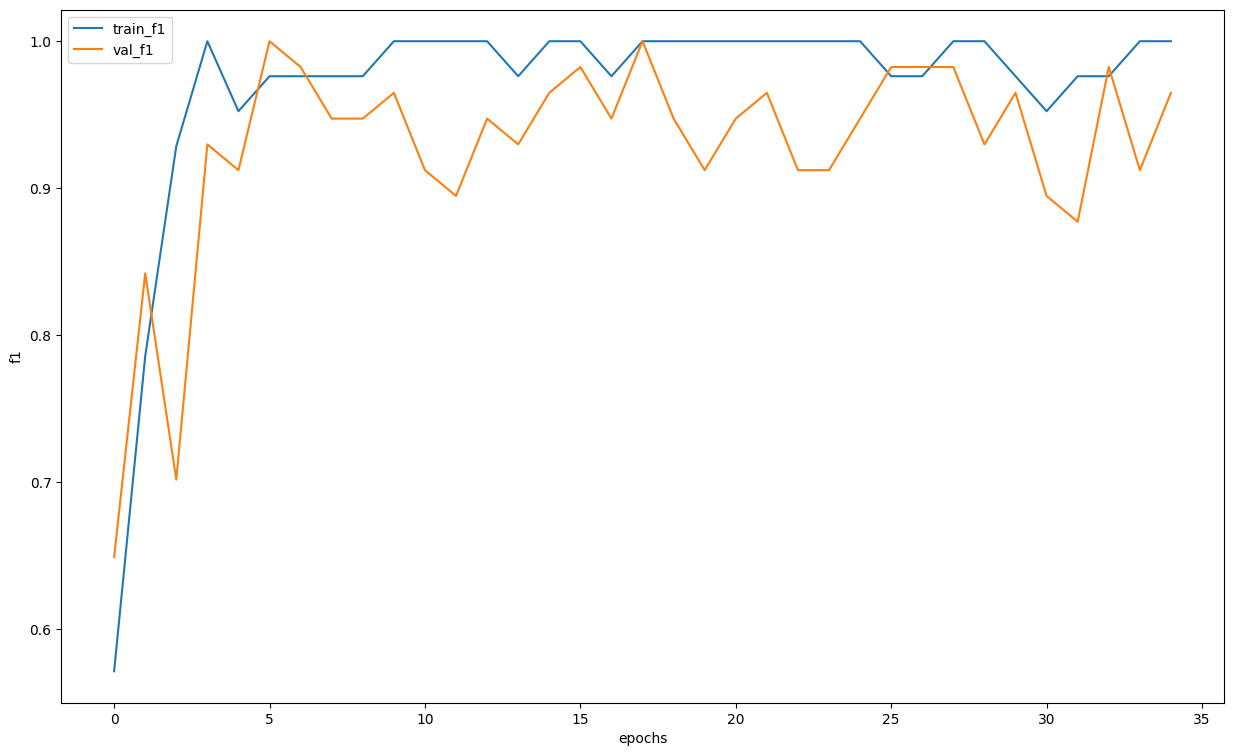

In [6]:
from matplotlib import pyplot as plt

for history_key in history:
    plt.figure(figsize=(15, 9))
    plt.plot(history[history_key]["train"], label=f"train_{history_key}")
    plt.plot(history[history_key]["val"], label=f"val_{history_key}")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel(history_key)
    plt.show()

In [7]:
import pandas as pd

submission = pd.read_csv(sample_submission_path)
submission.head()

,Id,Expected
0,img0.jpg,bart_simpson
1,img1.jpg,bart_simpson
2,img2.jpg,bart_simpson
3,img3.jpg,bart_simpson
4,img4.jpg,bart_simpson


In [8]:
from src.simpson_net import SimpsonNet
from src.dataset import SimpsonDataset
from torch.utils.data import DataLoader

test_dataset = SimpsonDataset(test_files, label_encoder, mode='test')
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=torch.cpu.device_count(),
    pin_memory=True,
)

model = SimpsonNet()
model.load_state_dict(torch.load(state_path))

result = []

model.eval()
for x_batch in test_loader:
    with torch.no_grad():
        outp = model(x_batch)
        preds = outp.argmax(1)
        result += preds.tolist()

submission['Expected'] = label_encoder.inverse_transform(result)
submission

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img2.jpg,mayor_quimby
3,img3.jpg,nelson_muntz
4,img4.jpg,lisa_simpson
...,...,...
986,img986.jpg,sideshow_bob
987,img987.jpg,nelson_muntz
988,img988.jpg,ned_flanders
989,img989.jpg,charles_montgomery_burns


In [9]:
submission.to_csv(submission_path, index=None)